## Machine Learning
### Regression - Linear Regression
### Classification - 분류
>Training Data Set 특성과 분포를 파악한 후 마지막 입력 데이터에 대해 **어떤 종류의 값**으로 분류될 수 있는지 예측
#### 1) Pass/Fail
* 2개 중 1개로 분류 -> **binary classification**
* 학습 후 예측 -> 그 결과값 0~1 실수 
    * 통상적으로 확률로
    * 0.5 이상 -> 1-> Pass / 0.5 미만 -> 0 -> Fail
    
#### 2) A, B, C, D 
>- x개 중 1개로 분류 -> **multinomial classification** 

### Classification 구현 알고리즘 중
* SVM, Naive Bayese : 기본적인 Classification 알고리즘
* Logistic Regression 
    * 1) 정확도가 상당히 높다
    * 2) Deep learning의 기본 Component
    
### Logistic Regression의 동작 방식
1. **Linear Regression**을 이용해서 Training Data Set의 특성과 분포를 파악하여 -> 2차원에서 직선을 찾는다.
2. 그 직선을 기준으로 데이터를 분류 (0 or 1)
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkPV9i%2FbtqJIM45QsJ%2F6dNZkMUA3wkl1EJb1a4tRk%2Fimg.png">

### Logistic Regression의 의미를 알아보자
* `pip install mglearn`

### Linear Regression으로 학습과 예측을 할 수 있을까?

[[-0.17382295]]
[4.5982984]


C:\Users\j828h\anaconda3\envs\data_env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


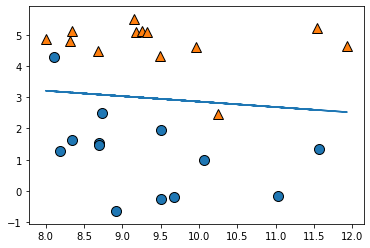

In [12]:
import numpy as np
from sklearn import linear_model
import mglearn # Dataset을 가져오기 위한 utility module
import matplotlib.pyplot as plt

# training data set

x, y = mglearn.datasets.make_forge()
# print(x)
# print(y)
# 하나의 점의 [x, y좌표]
# x의 데이터를 x축, y축으로 사용한다.
# y축의 데이터는 2차원 평면의 점이 0인지 1인지를 나타내는 데이터

mglearn.discrete_scatter(x[:,0], x[:,1],y)
# y값이 0이냐 1이냐에 따라 동그라미, 세모로 표시

# Linear Regression으로 x의 데이터를 학습해서 x 안에 있는 (x축, y축)
# 각 점들을 가장 잘 표현할 수 있는 직선을 그린다.

model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1, 1), x[:,1].reshape(-1, 1))
print(model.coef_) # 기울기, matrix니까 ravel
print(model.intercept_)
plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_)
# 경계 위 -> 1, 아래 -> 0

### 공부 시간에 따른 시험 합격 여부 데이터를 학습하고, 특정 공부시간을 입력했을 때의 합격 여부 알아내기

[[0.1292517]] [-0.27210884]


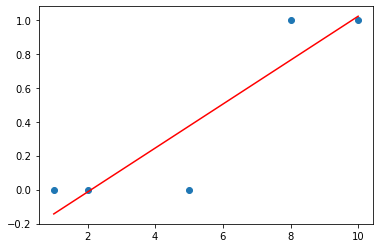

In [15]:
# 공부 시간에 따른 시험 합격 여부 데이터를 학습하고, 
# 특정 공부시간을 입력했을 때의 합격 여부 알아내기
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10])  # 공부시간
t_data = np.array([0,0,0,1,1])   # 시험합격여부(0:Fail, 1:Pass)

# Linear Regression Model 생성, 학습, 그래프 출력
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1),
          t_data.reshape(-1, 1))
print(model.coef_, model.intercept_)
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')

### 30이란 이상한 데이터를 추가해보자

[[0.03500583]] [0.17327888]


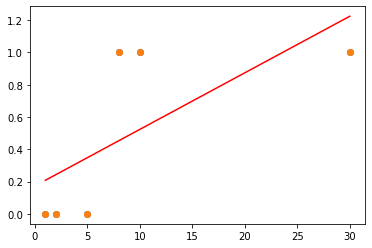

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
# 30이란 이상한 데이터를 추가해보자
x_data = np.array([1,2,5,8,10,30]) # 공부시간
t_data = np.array([0,0,0,1,1, 1])  # 시험 합격 여부 0:Fail, 1:Pass
plt.scatter(x_data, t_data)

# Linear Regression Model 생성, 학습, 그래프 출력
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1),
          t_data.reshape(-1, 1))
print(model.coef_, model.intercept_)
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')

# 8시간만 공부해도 합격하는데 9시간 이상 공부해야 합격으로 나온다.
# 확률이 1이 넘어가는 것도 나온다.
# => 직선으로 표현해서 그렇다. -> 1을 넘지 않도록 곡선으로 만든다면?

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbWdtCG%2FbtqJHaLVYTM%2F1cCmW85vQ7kEKZVFIwJeEK%2Fimg.png" width="80%">

## Sigmoid
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIcknL%2FbtqJKwnqSSd%2FnuBRkYtkRremQyMma7XEfK%2Fimg.png" width="50%">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVAzue%2FbtqJDYMdI4Y%2FfLsvJNdjkXWK4AkLFsJl91%2Fimg.png" width="90%">

### Sigmoid 함수를 씌워서 곡선으로 변환

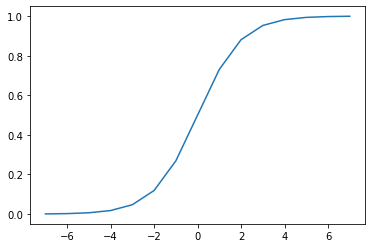

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(-7, 8) # [-7 -6 -5 .. 7]
y_data = 1 / (1+np.exp(-1 * x_data))

plt.plot(x_data, y_data)
plt.show()

* x1 시간, x2 외국 체류기간, t 시험 결과 (0:fail, 1:pass)
* 시간 3, 기간 2일 경우 시험 결과 예측값은?

In [22]:
import tensorflow as tf
import numpy as np

# 1. training data set
x_data = np.array([[1,0],
                   [2,0],
                   [5,1],
                   [2,3],
                   [3,3],
                   [8,1],
                   [10,0]])
t_data = np.array([[0],
                   [0],
                   [0],
                   [1],
                   [1],
                   [1],
                   [1]])

# 2. placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 3. Weight, & bias
W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 4. Hypothesis (Logistic Model)
logits = tf.matmul(X, W) + b  #  Linear Regression Hypothesis
H = tf.sigmoid(logits)

# 5. loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=T))

                      
### Linear Regression에서 사용한 코드 그대로 사용

# train 노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습을 진행(Graph를 실행)
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], feed_dict={X:x_data, T:t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, cost : {}'.format(W_val, b_val, loss_val))
        
# 예측!!
print(sess.run(H, feed_dict={X:[[4,2]]}))

W : [[-2.719455 ]
 [-1.2090642]], b : [0.47662365], cost : 9.899499893188477
W : [[0.05276501]
 [0.11985131]], b : [0.5979202], cost : 0.6592580080032349
W : [[0.08092299]
 [0.4220432 ]], b : [0.1463701], cost : 0.5591787695884705
W : [[0.12314336]
 [0.5940421 ]], b : [-0.26801503], cost : 0.49127325415611267
W : [[0.16439806]
 [0.71655375]], b : [-0.6343214], cost : 0.44087958335876465
W : [[0.20186852]
 [0.8138436 ]], b : [-0.95625407], cost : 0.4026493728160858
W : [[0.23529632]
 [0.89566094]], b : [-1.2405007], cost : 0.3730742335319519
W : [[0.2650903]
 [0.9667809]], b : [-1.4936018], cost : 0.34971293807029724
W : [[0.29179046]
 [1.0299286 ]], b : [-1.7211262], cost : 0.3308727443218231
W : [[0.3159013]
 [1.0868515]], b : [-1.9275844], cost : 0.31537866592407227
[[0.81941044]]


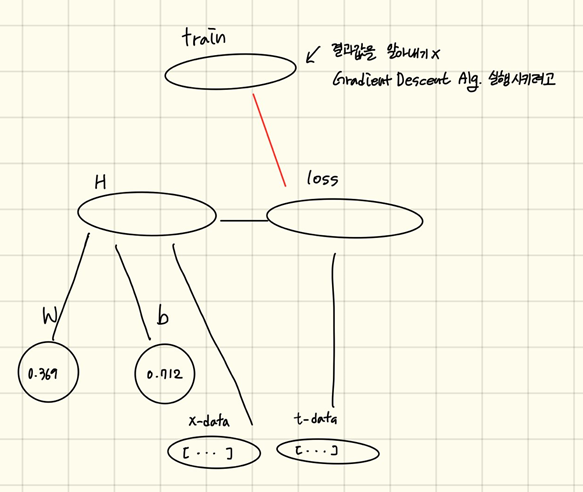